In [1]:
%matplotlib inline
import pydicom
import numpy as np
import skimage
import matplotlib.pyplot as plt

/home/ouroboros/.conda/envs/ml/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


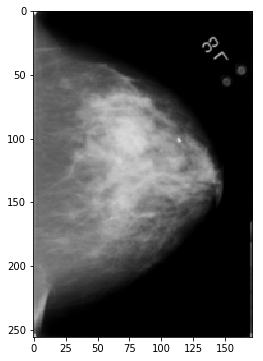

In [2]:
dicom_data = pydicom.dcmread('../../res/images/000000.dcm')
orig_img = dicom_data.pixel_array
img = skimage.transform.resize(orig_img, (256, 172), anti_aliasing=True)
fig,ax = plt.subplots(figsize=(8,6))
ax.imshow(img, cmap=plt.cm.gray)

# Performing image processing

### homomorphic filtering, output: $G$

$I(x, y) \to log \to high\ pass\ filter \to exp \to I'(x, y)$

### Gaussian low pass filter:

$H(u, v) = e^{\dfrac{-D^2(u,v)}{2D_0^2}}$

where $D$ is:

$D(u,v)=\sqrt{(u-\frac{M}{2})^2 + (v-\frac{N}{2})^2}$

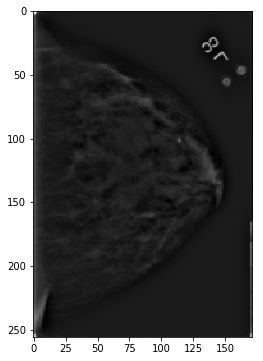

In [3]:
imgLog = np.log1p(img)
rows = img.shape[0]
cols = img.shape[1]

M = 2*rows + 1
N = 2*cols + 1
sigma = 10
(X, Y) = np.meshgrid(np.linspace(0, N-1, N), np.linspace(0, M-1, M))
centerX = np.ceil(N/2)
centerY = np.ceil(M/2)

# gaussian low pass filter
gaussianNumerator = (X - centerX)**2 + (Y-centerY)**2
H = np.exp(-gaussianNumerator/(2*sigma*sigma))

H = 1 - H # converting to high pass filter

# shift zero-frequency component to center (useful for visualizing a 
# Fourier transform with the zero-frequency component in the middle of the spectrum.)
# (in other words, shift the filter to the center)
H = np.fft.fftshift(H)

If = np.fft.fft2(imgLog, (M, N))
Iout = np.real(np.fft.ifft2(If * H, (M, N)))
Iout = Iout[0:rows, 0:cols]
Ihmf = np.expm1(Iout)
G = Ihmf

fig,ax = plt.subplots(figsize=(8,6))
ax.imshow(G, cmap=plt.cm.gray)